# TEXT DETECTION WITH NAVER CORP. CRAFT

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os
import json


import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data_path = 'E:/dataset/korean/korean/text_print'

In [3]:
# 1. 데이터 불러오기
file_list = [glob(os.path.join(data_path, 'sentence/*png')), glob(os.path.join(data_path, 'syllable/*png')),
             glob(os.path.join(data_path, 'word/*png'))]
file_list[0][0:10]

['E:/dataset/korean/korean/text_print\\sentence\\03343000.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343001.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343002.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343003.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343004.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343005.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343006.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343007.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343008.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343009.png']

In [4]:
with open(os.path.join(data_path,'printed_data_info.json'), 'r', encoding='utf-8') as f:
    json_data = json.load(f)

#print(json.dumps(json_data, indent="\t"))

In [5]:
json_data['annotations'][0]


{'attributes': {'font': '만화진흥원', 'type': '글자(음절)', 'is_aug': False},
 'id': '00000000',
 'image_id': '00000000',
 'text': '궶'}

In [6]:
for i in json_data['annotations'][0:10]:
    print(i['text'])

궶
뵞
푚
섆
읂
좠
떢
킠
뱝
뫢


In [7]:
before = ''
type_list = []
for i in range(len(json_data['annotations'])):
    if before != json_data['annotations'][i]['attributes']['type']:
        type_list.append(json_data['annotations'][i]['attributes']['type'])
    before = json_data['annotations'][i]['attributes']['type']

type_list

['글자(음절)', '단어(어절)', '문장']

In [8]:
#2. 데이터 시각화
#type별 데이터 개수 
type_count = []
for i in range(len(type_list)):
    type_count.append(0)
    for j in range(len(json_data['annotations'])):
        if type_list[i] == json_data['annotations'][j]['attributes']['type']:
            type_count[i] += 1
type_count


[532659, 262753, 40304]

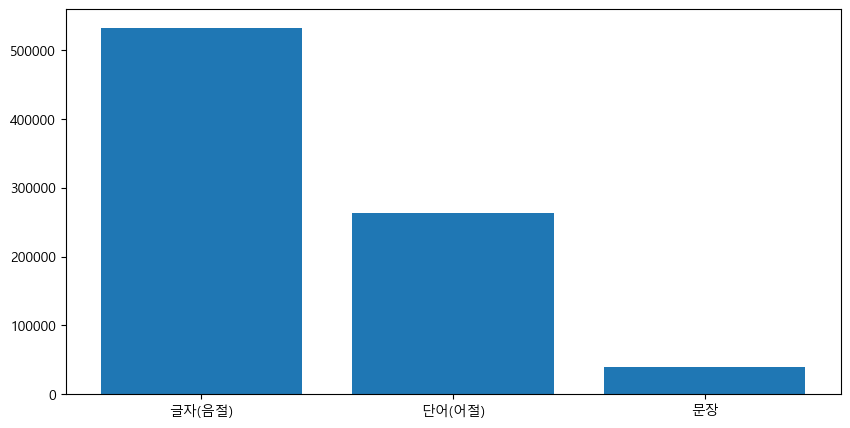

In [9]:
plt.figure(figsize=(10,5))
plt.bar(type_list, type_count)
plt.show()

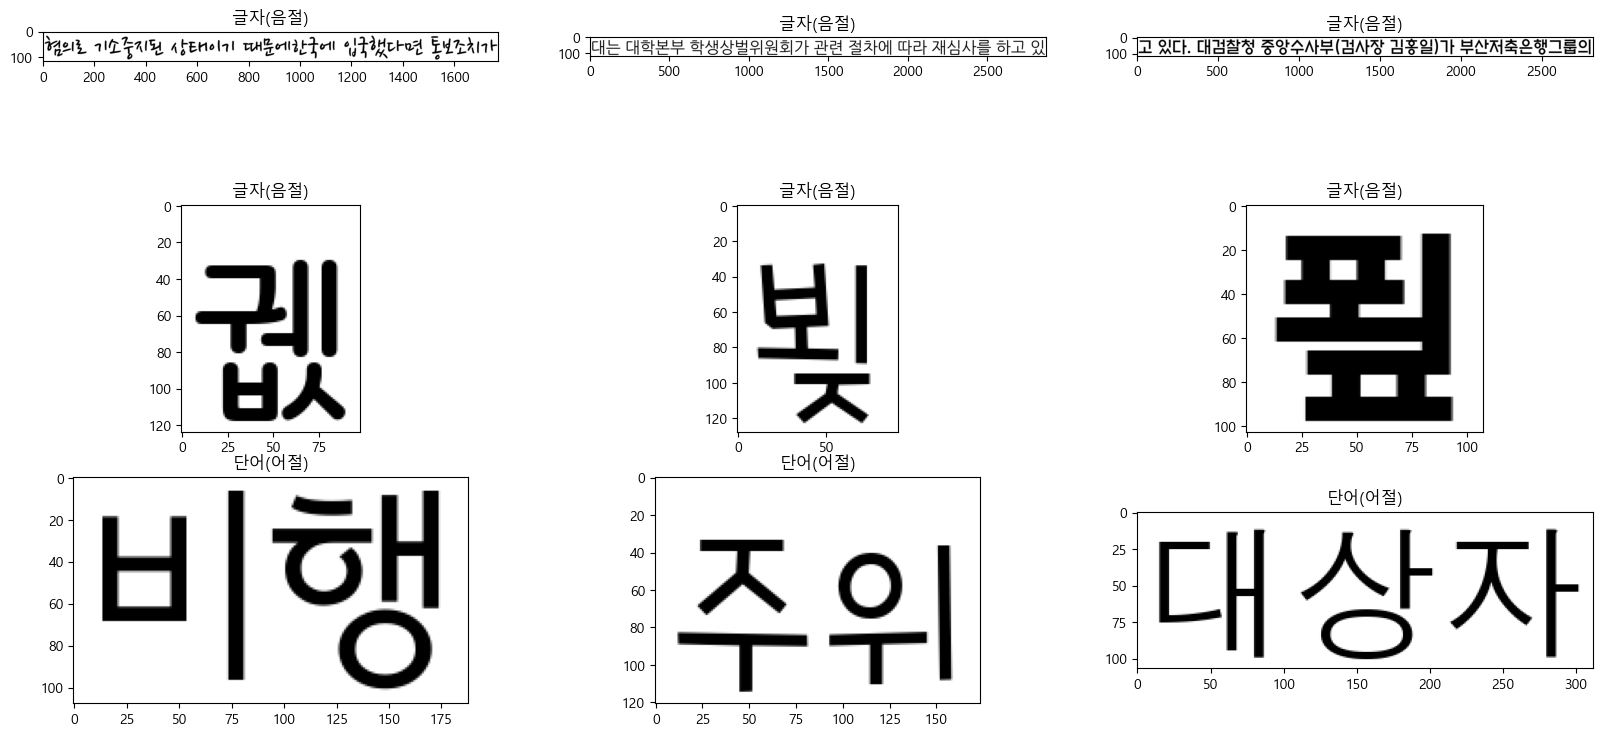

In [10]:
#type별 데이터 시각화
plt.figure(figsize=(20,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(file_list[i//3][i%3]))
    plt.title(type_list[(i//3+1)//3])

In [11]:
#위 데이터를 test 폴더에 복사
import shutil

for i in range(0,9):
   if os.path.exists(os.path.join(os.getcwd(),'test')): #test 폴더가 존재하면
       #print( file_list[i//3][i%3],'의 파일을 ', os.path.join(os.getcwd(),'test'),'에 복사합니다.')
       shutil.copy(file_list[i//3][i%3], os.path.join(os.getcwd(),'test'))
       
   else:
       os.mkdir(os.path.join(os.getcwd(),'test')) #test 폴더가 존재하지 않으면 만들고
       shutil.copy(file_list[i//3][i%3], os.path.join(os.getcwd(),'test'))
      
       

#text detection with Naver corp. CRAFT

# step 1.
<a href=https://github.com/clovaai/CRAFT-pytorch.git> 여기</a>에서 CRAFT-pytorch를 다운로드 받는다.
# step 2.
%pip install -r ./CRAFT-pytorch/requirements.txt #요구 모듈의 버전을 제거 후 설치 


# step 3. torchvison 버전에 따른 오류 해결
## Error#1. 
model_URL 오류 발생시 <a href =https://github.com/clovaai/CRAFT-pytorch/issues/191>여기<a>을 참고하여 model/vgg의 코드를 추가 한뒤 실행하시오.
## Error#2. 
model.VGG16_BN(pretrained=False, **kwargs)의 pretrained는 torchvision 0.13.0 이후 지원하지 않기에 <a href = https://github.com/JaidedAI/EasyOCR/issues/766>여기<a>를 참고하여 다음과 같이 수정하시오. 
CRAFT-pytorch/basenet/vgg16_bn.py와 CRAFT-pytorch/craft.py에 pretrained를 지우고 weights='VGG16_BN_Weights.DEFAULT'를 추가하면 높은 torchvision 버전에서도 실행이 가능하다.



```!python ./CRAFT-pytorch/test.py --trained_model={model_path} --test_folder={test_folder} --cuda=True```

위 코드를 실행하면 detection 결과가 ./result/에 저장된다. 


In [13]:
#detected text 시각화
#test 폴더의 파일을 CRAFT-pytorch 를 이용해서 detection
#!python ./CRAFT-pytorch/test.py --trained_model=./CRAFT-pytorch/model/craft_mlt_25k.pth --test_folder=./test/ --cuda=True`
   

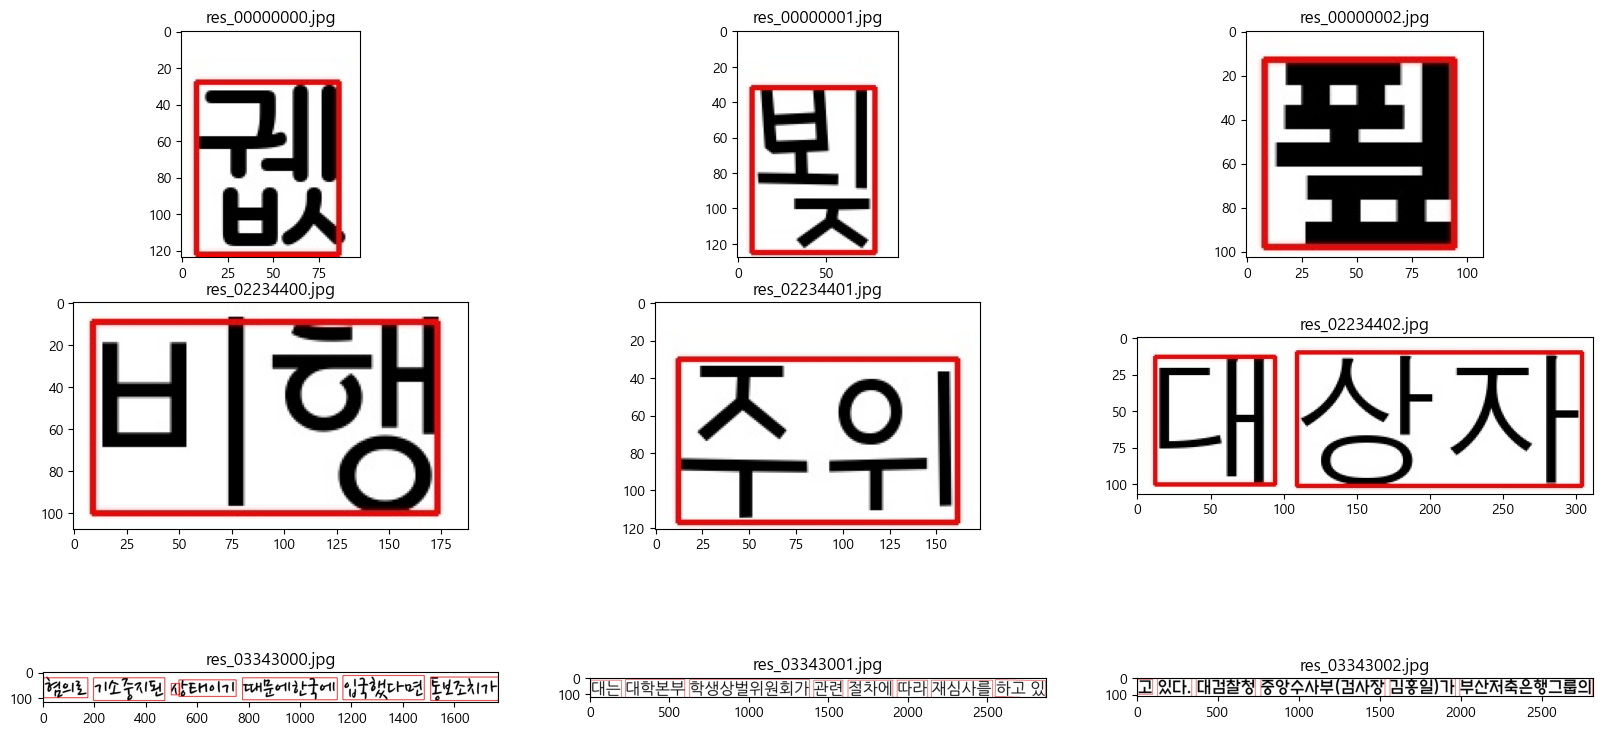

In [12]:
#detected text 시각화 결과 확인
plt.figure(figsize=(20,10))
detected_list = glob('./result/*jpg')[0::2] #홀수번째 파일만 가져오기 짝수번째에는 detection mask가 있음

for i in detected_list:
    plt.subplot(3,3,detected_list.index(i)+1)
    plt.imshow(plt.imread(i))
    plt.title(i.split('\\')[-1])


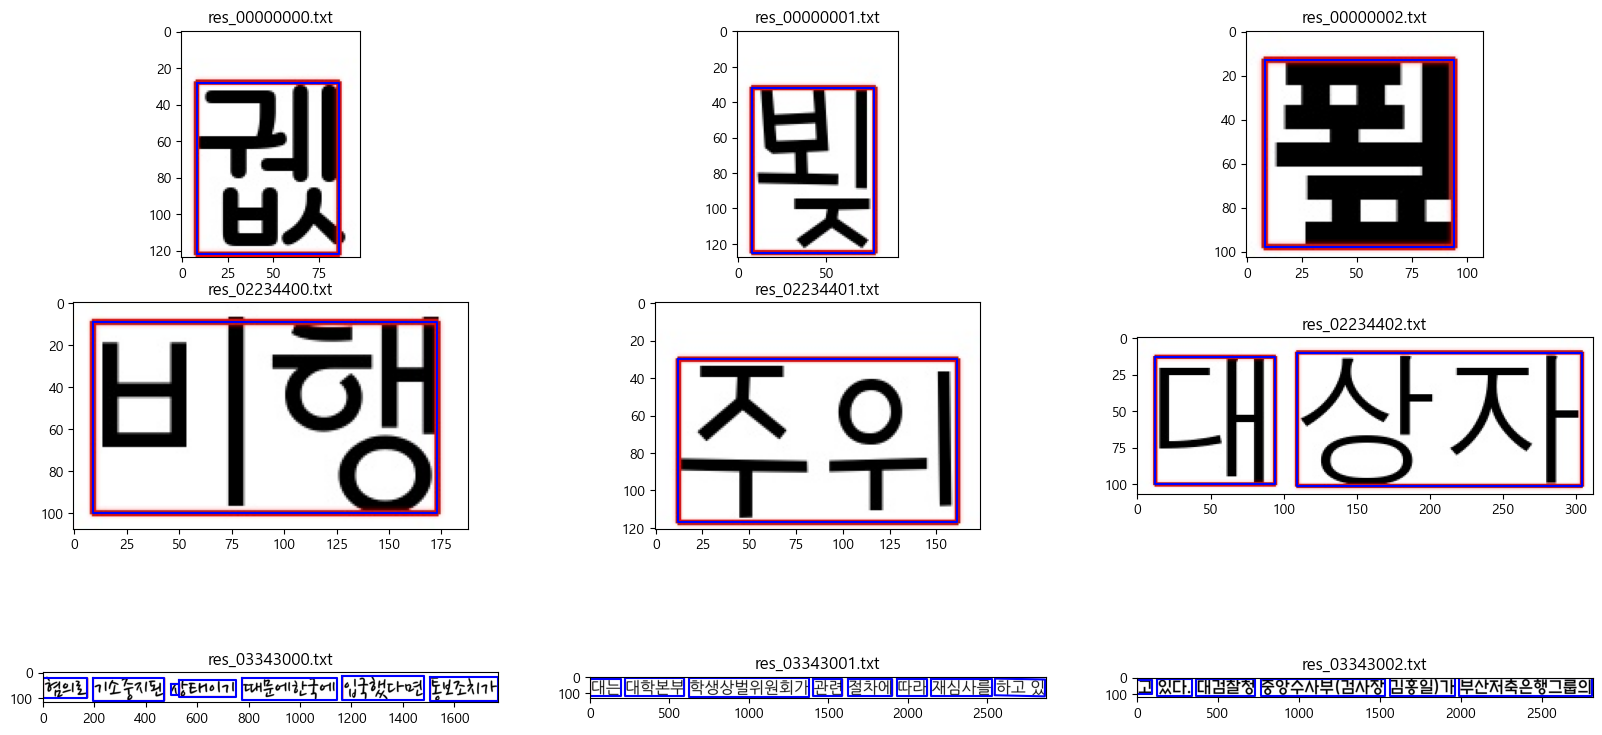

In [13]:

plt.figure(figsize=(20,10))
polys_list = glob('./result/*txt')
for i in polys_list:
    with open(i, 'r') as f:
        polys = f.readlines()
        for j in polys[0::2]:
            x1, y1, x2, y2, x3, y3, x4, y4 = map(float, j.split(',')[:8])
            plt.subplot(3,3,polys_list.index(i)+1)
            plt.imshow(plt.imread(i.replace('txt','jpg')))
            plt.title(i.split('\\')[-1])
            plt.plot([x1,x2,x3,x4,x1],[y1,y2,y3,y4,y1], 'b-')
            

# Text Recognition with CRNN

In [ ]:
#%pip install tqdm

In [50]:
#학습을 위한 csv 파일 생성
import pandas as pd
from tqdm import tqdm
# 
# df = pd.DataFrame(columns=['id','img_path', 'label'])
# for i,d in enumerate(tqdm(json_data ['annotations'])):
#     df.loc[i] = [d['image_id'], (data_path +'/'+ d['image_id']+'.png'), d['text']]
#     
# df.head()

100%|██████████| 835716/835716 [9:46:52<00:00, 23.73it/s]  


,id,img_path,label
0,00000000,E:/dataset/korean/korean/text_print\00000000.png,궶
1,00000001,E:/dataset/korean/korean/text_print\00000001.png,뵞
2,00000002,E:/dataset/korean/korean/text_print\00000002.png,푚
3,00000003,E:/dataset/korean/korean/text_print\00000003.png,섆
4,00000004,E:/dataset/korean/korean/text_print\00000004.png,읂


In [ ]:
#학습을 위한 csv 파일 생성
import pandas as pd
from tqdm import tqdm

df = pd.DataFrame(columns=['id','img_path', 'label'])
for i,d in enumerate(tqdm(json_data ['annotations'])):
    df.loc[i] = [d['image_id'], (data_path +'/'+ d['image_id']+'.png'), d['text']]
  
df.head()

 34%|███▍      | 287717/835716 [54:25<3:27:17, 44.06it/s] 

In [ ]:
#df.to_csv(os.path.join(data_path,'data.csv'), index=False)

In [40]:
def rename_data(data_path):
     if int(data_path.split("\\")[-1].split(".")[0]) <= 532658:
        data_path.replace('text_print', 'text_print/syllable')
     elif int(data_path.split("\\")[-1].split(".")[0]) <= 2497152:
        data_path.replace('text_print','text_print/word')
     else:
        data_path.replace('text_print','text_print/sentence')
       

In [67]:
df = pd.read_csv(os.path.join(data_path,'data.csv'))
df.img_path = df.img_path.apply(lambda x: rename_data(x))
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 224: invalid start byte

In [14]:
#df중 5%를 추출해서 8:2 비율로 train, test로 나누기
df = pd.read_csv(os.path.join(data_path,'data.csv')).sample(frac=0.05, random_state=41)
train = df.sample(frac=0.8, random_state=41)
test = df.sample(frac=0.2, random_state=41)
train.to_csv(os.path.join(data_path,'train.csv'), index=False)
test.to_csv(os.path.join(data_path,'test.csv'), index=False)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [16]:
import random

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from PIL import Image 
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

CFG = {
    'IMG_HEIGHT_SIZE':32,
    'IMG_WIDTH_SIZE':112,
    'EPOCHS':10,
    'LEARNING_RATE':1e-3,
    'BATCH_SIZE':8,
    'NUM_WORKERS':4, # 본인의 GPU, CPU 환경에 맞게 설정
    'SEED':41
}

In [17]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

In [18]:
df = pd.read_csv(os.path.join(data_path,'train.csv'), encoding='utf-8')
#음절
df['len'] = df['label'].str.len()
train_v1 = df[df['len']==1] 

#1음절 이상
df = df[df['len']>1]
train_v2, val, _, _ = train_test_split(df, df['len'], test_size=0.2, random_state=CFG['SEED'])

train = pd.concat([train_v1, train_v2])
print(len(train), len(val))

9189 2298


In [19]:
train_gt = [gt for gt in train['label']]
train_gt = "".join(train_gt)
letters = sorted(list(set(list(train_gt))))
print(len(letters))

1035


In [20]:
vocabulary = ["-"] + letters
print(len(vocabulary))
idx2char = {k:v for k,v in enumerate(vocabulary, start=0)}
char2idx = {v:k for k,v in idx2char.items()}

1036


In [21]:
class CustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, train_mode=True):
        self.img_path_list = img_path_list
        self.label_list = label_list
        self.train_mode = train_mode
        
    def __len__(self):
        return len(self.img_path_list)
    
    def __getitem__(self, index):
        image = Image.open(self.img_path_list[index]).convert('RGB')
        
        if self.train_mode:
            image = self.train_transform(image)
        else:
            image = self.test_transform(image)
            
        if self.label_list is not None:
            text = self.label_list[index]
            return image, text
        else:
            return image
    
    # Image Augmentation
    def train_transform(self, image):
        transform_ops = transforms.Compose([
            transforms.Resize((CFG['IMG_HEIGHT_SIZE'],CFG['IMG_WIDTH_SIZE'])),
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
        ])
        return transform_ops(image)
    
    def test_transform(self, image):
        transform_ops = transforms.Compose([
            transforms.Resize((CFG['IMG_HEIGHT_SIZE'],CFG['IMG_WIDTH_SIZE'])),
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
        ])
        return transform_ops(image)

In [22]:
train_dataset = CustomDataset(train['img_path'].values, train['label'].values, True)
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=CFG['NUM_WORKERS'])

val_dataset = CustomDataset(val['img_path'].values, val['label'].values, False)
val_loader = DataLoader(val_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=CFG['NUM_WORKERS'])

In [24]:
train_dataset.__getitem__(0)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/dataset/korean/korean/text_print\\02303117.png'

In [ ]:
train_loader_iter = iter(train_loader)
image_batch, text_batch = train_loader_iter.next()
print(image_batch.size(), text_batch)

In [ ]:
from torchvision.models import resnet18

class RecognitionModel(nn.Module):
    def __init__(self, num_chars=len(char2idx), rnn_hidden_size=256):
        super(RecognitionModel, self).__init__()
        self.num_chars = num_chars
        self.rnn_hidden_size = rnn_hidden_size
        
        # CNN Backbone = 사전학습된 resnet18 활용
        # https://arxiv.org/abs/1512.03385
        resnet = resnet18(pretrained=True)
        # CNN Feature Extract
        resnet_modules = list(resnet.children())[:-3]
        self.feature_extract = nn.Sequential(
            *resnet_modules,
            nn.Conv2d(256, 256, kernel_size=(3,6), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )

        self.linear1 = nn.Linear(1024, rnn_hidden_size)
        
        # RNN
        self.rnn = nn.RNN(input_size=rnn_hidden_size, 
                            hidden_size=rnn_hidden_size,
                            bidirectional=True, 
                            batch_first=True)
        self.linear2 = nn.Linear(self.rnn_hidden_size*2, num_chars)
        
        
    def forward(self, x):
        # CNN
        x = self.feature_extract(x) # [batch_size, channels, height, width]
        x = x.permute(0, 3, 1, 2) # [batch_size, width, channels, height]
         
        batch_size = x.size(0)
        T = x.size(1)
        x = x.view(batch_size, T, -1) # [batch_size, T==width, num_features==channels*height]
        x = self.linear1(x)
        
        # RNN
        x, hidden = self.rnn(x)
        
        output = self.linear2(x)
        output = output.permute(1, 0, 2) # [T==10, batch_size, num_classes==num_features]
        
        return output

In [ ]:
criterion = nn.CTCLoss(blank=0) # idx 0 : '-'

In [ ]:
def encode_text_batch(text_batch):
    text_batch_targets_lens = [len(text) for text in text_batch]
    text_batch_targets_lens = torch.IntTensor(text_batch_targets_lens)
    
    text_batch_concat = "".join(text_batch)
    text_batch_targets = [char2idx[c] for c in text_batch_concat]
    text_batch_targets = torch.IntTensor(text_batch_targets)
    
    return text_batch_targets, text_batch_targets_lens

In [ ]:
def compute_loss(text_batch, text_batch_logits):
    """
    text_batch: list of strings of length equal to batch size
    text_batch_logits: Tensor of size([T, batch_size, num_classes])
    """
    text_batch_logps = F.log_softmax(text_batch_logits, 2) # [T, batch_size, num_classes]  
    text_batch_logps_lens = torch.full(size=(text_batch_logps.size(1),), 
                                       fill_value=text_batch_logps.size(0), 
                                       dtype=torch.int32).to(device) # [batch_size] 

    text_batch_targets, text_batch_targets_lens = encode_text_batch(text_batch)
    loss = criterion(text_batch_logps, text_batch_targets, text_batch_logps_lens, text_batch_targets_lens)

    return loss

In [ ]:
def train(model, optimizer, train_loader, val_loader, scheduler, device):
    model.to(device)
    
    best_loss = 999999
    best_model = None
    for epoch in range(1, CFG['EPOCHS']+1):
        model.train()
        train_loss = []
        for image_batch, text_batch in tqdm(iter(train_loader)):
            image_batch = image_batch.to(device)
            
            optimizer.zero_grad()
            
            text_batch_logits = model(image_batch)
            loss = compute_loss(text_batch, text_batch_logits)
            
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())
        
        _train_loss = np.mean(train_loss)
        
        _val_loss = validation(model, val_loader, device)
        print(f'Epoch : [{epoch}] Train CTC Loss : [{_train_loss:.5f}] Val CTC Loss : [{_val_loss:.5f}]')
        
        if scheduler is not None:
            scheduler.step(_val_loss)
        
        if best_loss > _val_loss:
            best_loss = _val_loss
            best_model = model
    
    return best_model

In [ ]:
def validation(model, val_loader, device):
    model.eval()
    val_loss = []
    with torch.no_grad():
        for image_batch, text_batch in tqdm(iter(val_loader)):
            image_batch = image_batch.to(device)
            
            text_batch_logits = model(image_batch)
            loss = compute_loss(text_batch, text_batch_logits)
            
            val_loss.append(loss.item())
    
    _val_loss = np.mean(val_loss)
    return _val_loss

In [ ]:
model = RecognitionModel()
model.eval()
optimizer = torch.optim.Adam(params = model.parameters(), lr = CFG["LEARNING_RATE"])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2,threshold_mode='abs',min_lr=1e-8, verbose=True)

infer_model = train(model, optimizer, train_loader, val_loader, scheduler, device)

# Test

In [ ]:
test   = pd.read_csv(os.path.join(data_path,'test.csv'),encoding='utf-8')
test = test.drop(['label','len'], axis=1)

In [ ]:
test_dataset = CustomDataset(test['img_path'].values, None, False)
test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=CFG['NUM_WORKERS'])

In [ ]:
def decode_predictions(text_batch_logits):
    text_batch_tokens = F.softmax(text_batch_logits, 2).argmax(2) # [T, batch_size]
    text_batch_tokens = text_batch_tokens.numpy().T # [batch_size, T]

    text_batch_tokens_new = []
    for text_tokens in text_batch_tokens:
        text = [idx2char[idx] for idx in text_tokens]
        text = "".join(text)
        text_batch_tokens_new.append(text)

    return text_batch_tokens_new

def inference(model, test_loader, device):
    model.eval()
    preds = []
    with torch.no_grad():
        for image_batch in tqdm(iter(test_loader)):
            image_batch = image_batch.to(device)
            
            text_batch_logits = model(image_batch)
            
            text_batch_pred = decode_predictions(text_batch_logits.cpu())
            
            preds.extend(text_batch_pred)
    return preds

In [ ]:
predictions = inference(infer_model, test_loader, device)

# Text Recognition with CRNN v2
해당 부분은 바운딩 detection을 통해 추출한 bounding박스와 이미지를 이용하여 학습하려는 시도임.

In [ ]:
from crnn_utils.dataset import CustomDatasetWithBoundingBox
from torch.utils.data import DataLoader

train_dataset = CustomDatasetWithBoundingBox(train['img_path'].values, train['label'].values, True)
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=CFG['NUM_WORKERS'])

val_dataset = CustomDatasetWithBoundingBox(val['img_path'].values, val['label'].values, False)
val_loader = DataLoader(val_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=CFG['NUM_WORKERS'])

In [ ]:
start = 44032  # '가'의 유니코드 값
char_korean = list(chr(start + i) for i in range(11172))

idx2char = {i: char for i, char in enumerate(char_korean)}
char2idx = {char: i for i, char in idx2char.items()}

In [ ]:
criteraion = torch.nn.CTCLoss(blank=0)

def encode_text_batch(text_batch):
    text_batch_targets_lens = [len(text) for text in text_batch]
    text_batch_targets_lens = torch.IntTensor(text_batch_targets_lens)
    
    text_batch_concat = "".join(text_batch)
    text_batch_targets = [char2idx[c] for c in text_batch_concat]
    text_batch_targets = torch.IntTensor(text_batch_targets)
    
    return text_batch_targets, text_batch_targets_lens

def compute_loss(text_batch, text_batch_logits):
    """
    text_batch: list of strings of length equal to batch size
    text_batch_logits: Tensor of size([T, batch_size, num_classes])
    """
    text_batch_logps = F.log_softmax(text_batch_logits, 2) # [T, batch_size, num_classes]  
    text_batch_logps_lens = torch.full(size=(text_batch_logps.size(1),), 
                                       fill_value=text_batch_logps.size(0), 
                                       dtype=torch.int32).to(device) # [batch_size] 

    text_batch_targets, text_batch_targets_lens = encode_text_batch(text_batch)
    loss = criterion(text_batch_logps, text_batch_targets, text_batch_logps_lens, text_batch_targets_lens)

    return loss

In [ ]:
def train(model, optimizer, train_loader, val_loader, scheduler, device):
    model.to(device)
    
    best_loss = 999999
    best_model = None
    for epoch in range(1, CFG['EPOCHS']+1):
        model.train()
        train_loss = []
        for image_batch, text_batch in tqdm(iter(train_loader)):
            image_batch = image_batch.to(device)
            
            optimizer.zero_grad()
            
            text_batch_logits = model(image_batch)
            loss = compute_loss(text_batch, text_batch_logits)
            
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())
        
        _train_loss = np.mean(train_loss)
        
        _val_loss = validation(model, val_loader, device)
        print(f'Epoch : [{epoch}] Train CTC Loss : [{_train_loss:.5f}] Val CTC Loss : [{_val_loss:.5f}]')
        
        if scheduler is not None:
            scheduler.step(_val_loss)
        
        if best_loss > _val_loss:
            best_loss = _val_loss
            best_model = model
    
    return best_model



In [ ]:
def validation(model, val_loader, device):
    model.eval()
    val_loss = []
    with torch.no_grad():
        for image_batch, text_batch in tqdm(iter(val_loader)):
            image_batch = image_batch.to(device)
            
            text_batch_logits = model(image_batch)
            loss = compute_loss(text_batch, text_batch_logits)
            
            val_loss.append(loss.item())
    
    _val_loss = np.mean(val_loss)
    return _val_loss

In [ ]:
from crnn_utils import dataset, model

model = model.CRNN(num_chars=len(char2idx), rnn_hidden_size=256)
model.eval()
optimizer = torch.optim.Adam(model.parameters(), lr=CFG['LEARNING_RATE'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.8, verbose=True)

infer_model = train(model, optimizer, train_loader, val_loader, scheduler, device)

In [ ]:
#커스텀데이터셋이 작동하는지 테스트
from crnn_utils.dataset import CustomDatasetWithBoundingBox
from torchvision import transforms
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
transform = transforms.Compose([
    transforms.Resize((32, 100)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_dataset = CustomDatasetWithBoundingBox(json_path= os.path.join(data_path,'printed_data_info.json'), origin_data_path='./test',result_data_path='./result', transform=transform) #origin_data_path는 원본이미지가 있는 폴더, result_data_path는 detection 결과가 있는 현 test로 설정했지만 이는 수정해야함.
plt.figure(figsize=(5,5))
#print(train_dataset.polys[0][:])

fig, ax = plt.subplots()
ax.imshow(train_dataset.images[0])
for coord in train_dataset.polys[0][:]:
    polygon = Polygon(coord, closed=True, edgecolor='r', fill=False)
    ax.add_patch(polygon)

In [ ]:
#다음과 같이 시각화를 간소화 하였음.
train_dataset.__plotting__(6)

In [ ]:
train_dataset.__getitem__(0)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from crnn_utils.dataset import get_dataloader, collate_fn
from crnn_utils.model import CRNN
import os

# 학습에 사용할 데이터 경로 및 설정
data_path = 'E:/dataset/korean/korean/text_print'
batch_size = 8
learning_rate = 0.001
num_epochs = 10

# 데이터셋 및 데이터로더 정의
train_loader = get_dataloader(json_path=os.path.join(data_path, 'printed_data_info.json'),
                               origin_data_path='./test', result_data_path='./result',
                               batch_size=batch_size, num_workers=0)

# 모델, 손실 함수, 최적화 기법 정의
model = CRNN(num_chars=37, rnn_hidden_size=256)
criterion = nn.CTCLoss(blank=0)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for images, targets, bounding_boxes, label_lengths, bounding_box_lengths in train_loader:
        # Optimizer 초기화
        optimizer.zero_grad()
        
        # 모델에 입력
        preds = model(images)
        preds = preds.permute(1, 0, 2) # (batch, time, n_class)
        
        # 손실 함수 계산
        loss = criterion(preds, targets, label_lengths, bounding_box_lengths)
        
        
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}')

# 학습된 모델 저장
torch.save(model.state_dict(), 'crnnV2_model.pth')


